In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(filepath_or_buffer="data.csv", sep=",", header=0)

In [3]:
df.columns.to_list()

['Data',
 'Horário Coleta',
 'Estação',
 'Tempo atm.',
 'Local de coleta',
 'Sub-família',
 'Tribo',
 'Gênero',
 'Espécie',
 'Visitante',
 'Sexo',
 'n° do indivíduo',
 'Código p/ área',
 'Comp/larg (mm) do vis.',
 'Coletado em',
 'Família da planta',
 'Cor da flor',
 'Mácula da flor',
 'Simetria floral',
 'Guia de Néctar',
 'Aroma',
 'Recurso coletado',
 'Polinizador']

In [4]:
df[['Recurso coletado']].describe()

,Recurso coletado
count,189
unique,7
top,Néctar
freq,83


<Axes: xlabel='Coletado em'>

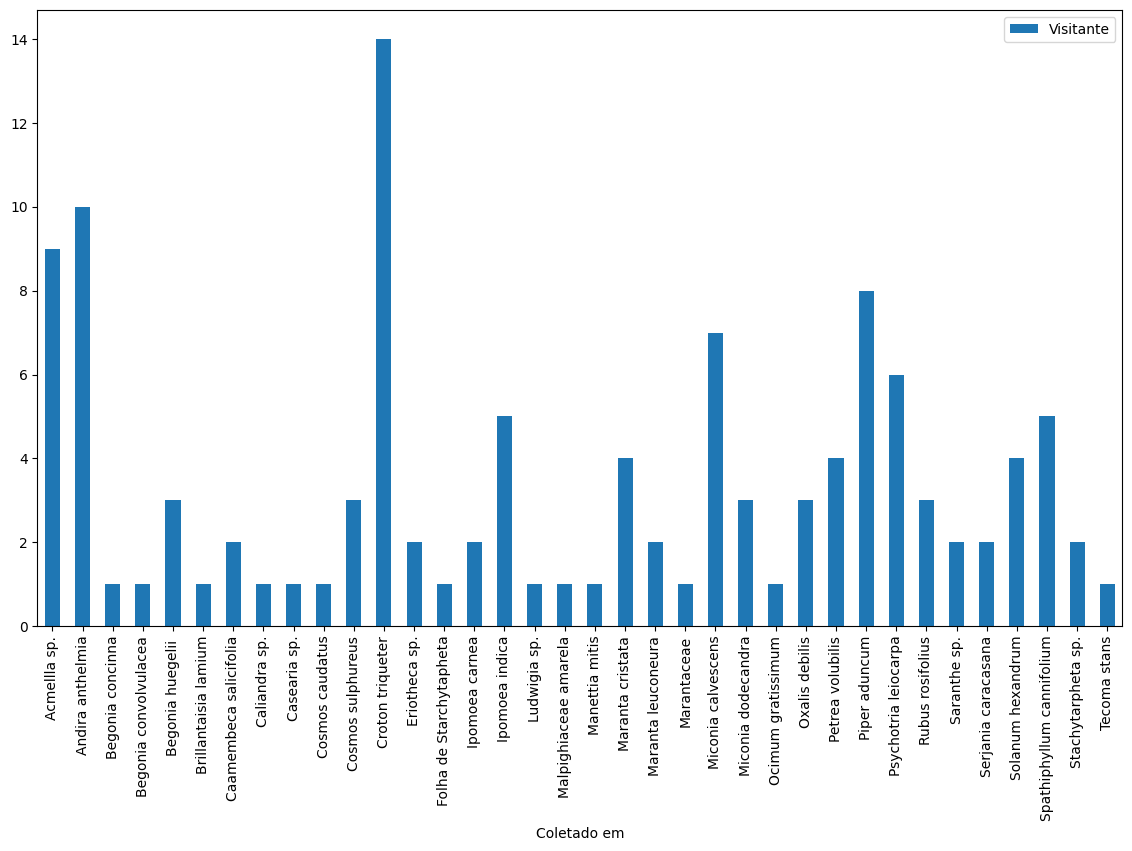

In [5]:
df[~df['Família da planta'].isnull()][['Visitante', 'Coletado em']].drop_duplicates().groupby("Coletado em").count().reset_index().plot.bar(y="Visitante", x="Coletado em", figsize=(14,8))

In [6]:
df[~df['Visitante'].isnull()].drop_duplicates(subset=['Visitante'])

,Data,Horário Coleta,Estação,Tempo atm.,Local de coleta,Sub-família,Tribo,Gênero,Espécie,Visitante,...,Comp/larg (mm) do vis.,Coletado em,Família da planta,Cor da flor,Mácula da flor,Simetria floral,Guia de Néctar,Aroma,Recurso coletado,Polinizador
0,13/04/24,10:30,Outono,Sol,R. Caminho da Serra (Z.A.),Apinae,Ancylocelidini,Ancyloscelis,apiformis,Ancyloscelis apiformis,...,NaN,Ipomoea carnea,Convolvulaceae,purpura,Branca,Actinomorfa,NaN,Não,NaN,NaN
1,25/01/24,11:00,Verão,Sol,R. Caminho da Serra (Z.A.),Megachilinae,Anthidiini,NaN,sp.1,Anthidiini sp.1,...,NaN,Ocimum gratissimum,Lamiaceae,Branca,NaN,Zigomorfa,NaN,Não,Pólen,NaN
4,07/01/25,11:10,Verão,Sol,Estrada da Torre (PEM),Megachilinae,Anthidiini,NaN,sp.2,Anthidiini sp.2,...,NaN,Croton triqueter,Euphorbiaceae,Branca,NaN,Actinomorfa,NaN,Não,Pólen,NaN
5,07/01/25,11:10,Verão,Sol,Estrada da Torre (PEM),Megachilinae,Anthidiini,NaN,sp.2,Anthidiini sp.3,...,NaN,Croton triqueter,Euphorbiaceae,Branca,NaN,Actinomorfa,NaN,Não,Néctar,NaN
6,21/09/24,?,Inverno,Sol,R. Caminho da Serra (Z.A.),Apinae,Apini,Apis,mellifera,Apis mellifera,...,NaN,Andira anthelmia,Fabaceae,Rosa,Branca,Zigomorfa,NaN,Sim,Néctar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,14/06/24,08:40,Inverno,Sol,Estrada da Torre (PEM),Apinae,Meliponini,Trigona,sp.1,Trigona sp.1,...,NaN,Caliandra sp.,Fabaceae,Rosa (?),NaN,Actinomorfa,NaN,Não,Pólen,NaN
208,21/09/24,11:10,Inverno,Sol,R. Caminho da Serra (Z.A.),Apinae,Meliponini,Trigona,spinipes,Trigona spinipes,...,NaN,Andira anthelmia,Fabaceae,Rosa,Branca,Zigomorfa,NaN,Sim,NaN,NaN
209,08/11/23,?,Primavera,?,Estrada da Torre (PEM),Apinae,Tapinotaspidini,Trigonopedia,ferruginea,Trigonopedia ferruginea,...,NaN,Begonia concinna,Begoniaceae,Branca,Amarela,Zigomorfa,NaN,Não,Néctar,NaN
212,21/09/24,10:30,Inverno,Sol,R. Caminho da Serra (Z.A.),Apinae,Xylocopini,Xylocopa,brasilianorum,Xylocopa brasilianorum,...,NaN,Andira anthelmia,Fabaceae,Rosa,Branca,Zigomorfa,NaN,Sim,Néctar,NaN


In [7]:
df_deduplicado = df[['Visitante', 'Coletado em']].drop_duplicates()

df_deduplicado

,Visitante,Coletado em
0,Ancyloscelis apiformis,Ipomoea carnea
1,Anthidiini sp.1,Ocimum gratissimum
4,Anthidiini sp.2,Croton triqueter
5,Anthidiini sp.3,Croton triqueter
6,Apis mellifera,Andira anthelmia
...,...,...
209,Trigonopedia ferruginea,Begonia concinna
211,Trigonopedia ferruginea,Psychotria leiocarpa
212,Xylocopa brasilianorum,Andira anthelmia
213,Xylocopa frontalis,Andira anthelmia


In [8]:
df_interacoes = pd.DataFrame(0, index=df['Visitante'].drop_duplicates().to_list(), columns=df['Coletado em'].drop_duplicates().to_list())

df_interacoes

,Ipomoea carnea,Ocimum gratissimum,Croton triqueter,Andira anthelmia,Psychotria leiocarpa,Rubus rosifolius,Marantaceae,Ipomoea indica,Acmellla sp.,Isca de Eucaliptol,...,Begonia convolvulacea,Begonia huegelii,Serjania caracasana,Eriotheca sp.,Saranthe sp.,Folha de Starchytapheta,Malpighiaceae amarela,Caliandra sp.,Brillantaisia lamium,Begonia concinna
Ancyloscelis apiformis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anthidiini sp.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anthidiini sp.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Anthidiini sp.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apis mellifera,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trigona sp.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigona spinipes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigonopedia ferruginea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xylocopa brasilianorum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
for _, row in df_deduplicado.iterrows():
    df_interacoes.at[row['Visitante'], row['Coletado em']] += 1

df_interacoes.to_csv(path_or_buf="interacoes.csv", header=True, index=True, sep="|")

In [13]:
from sankey import SankeyGraph

sankey = SankeyGraph(df=df_interacoes)

sankey.graph(title="Visitantes X Coletado em")

In [12]:
sankey.write_html(file="image.html")